In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors

---

In [2]:
# Шаблон
'''
phi_min = 
    phi_max = 

    if phi_min < phi < phi_max:
'''

'\nphi_min = \n    phi_max = \n\n    if phi_min < phi < phi_max:\n'

In [3]:
def S_drop(phi, l, theta):
    phi_min = 0
    phi_max = np.pi*(4 + (1+np.cos(theta))**2*np.cos(theta))/3/l/l/(1-np.cos(theta))**3

    if phi_min < phi < phi_max:
        r = np.cbrt(3*phi*l*l / np.pi / (4 + (1 + np.cos(theta))**2 * np.cos(theta)))

        return np.pi*r*r*(2 + np.sin(theta) - 2*np.cos(theta)), (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

In [4]:
def S_drop_180(phi, l):
    phi_min = 0
    phi_max = np.pi / 6 / l / l

    if phi_min < phi < phi_max:
        return np.cbrt(36*np.pi*(phi*l*l)**2), (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

In [5]:
def S_dou(phi, l, theta):
    phi_min = -2*np.pi*(-5 + np.cos(2*theta) + 3*(np.pi-2*theta)*np.tan(theta))/48/l/l/np.cos(theta)**2
    phi_max = np.pi*(9*np.cos(theta) - np.cos(3*theta) + 6*(1+l*np.cos(theta))*(l - np.pi + 2*theta + 2*np.cos(theta) + l*np.cos(2*theta) - np.sin(2*theta)))/48/l/l/np.cos(theta)**3

    if phi_min < phi < phi_max: 
        d = (np.pi-2*theta)/np.cos(theta)**2/4 - np.tan(theta)/2 + np.sqrt(-4 + 64*phi*l*l/np.pi + (np.pi-2*theta)**2/np.cos(theta)**4 + 8*(np.cos(2*theta)-5)/np.cos(theta)**2/3 + 4*(1+(np.pi-2*theta)*np.tan(theta))/np.cos(theta)**2) / 4

        return np.pi*d*d/2 - np.pi/np.cos(theta) + np.pi*(np.pi-2*theta)*(d+np.tan(theta))/np.cos(theta)/2, (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

In [6]:
def S_dou_180(phi, l):
    phi_min = np.pi / 6 / l / l
    phi_max = np.pi * (1/4 + (np.pi-4)/8/l + (10-3*np.pi)/24/l/l)

    if phi_min < phi < phi_max:
        return -np.pi**3/16 + 2*np.pi/3 + 2*phi*l*l + np.sqrt(3*np.pi**3*(3*np.pi**3 - 32*np.pi + 192*phi*l*l))/48, (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

In [7]:
def S_worm(phi, l, theta):
    phi_min = 0
    phi_max = (2*theta - np.sin(2*theta))/2/l/(1 - np.cos(theta))**2

    if phi_min < phi < phi_max:
        r = np.sqrt(2*phi*l / (2*theta - np.sin(2*theta)))

        return 2*l*r*(theta + np.sin(theta)), (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

In [8]:
def S_worm_180(phi, l):
    phi_min = 0
    phi_max = np.pi/4/l

    if phi_min < phi < phi_max:
        return 2 * np.sqrt(np.pi*phi*l**3), (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

In [9]:
def S_roll(phi, l, theta):
    phi_min = -(np.pi-2*theta)/4/l/np.cos(theta)**2 + np.tan(theta)/2/l
    phi_max = 1 + 1/l/np.cos(theta) - (np.pi-2*theta)/4/l/np.cos(theta)**2 - np.tan(theta)/2/l

    if phi_min < phi < phi_max:
        d = phi*l + (np.pi-2*theta)/np.cos(theta)**2/4 - np.tan(theta)/2

        return 2*d*l + l*(np.pi-2*theta)/np.cos(theta), (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

In [10]:
def S_roll_180(phi, l):
    phi_min = np.pi/4/l
    phi_max = 1 + (np.pi - 4)/4/l

    if phi_min < phi < phi_max:
        return np.pi*l/2 + 2*phi*l*l, (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

In [11]:
def S_perf(phi, l, theta):
    phi_min = 1 - np.pi/4 + np.pi*np.tan(theta)/4/l + np.pi*(1 - 3/np.cos(theta)**2 - 3*(np.pi-2*theta)*(l-np.tan(theta))/2/np.cos(theta)**2)/12/l/l
    phi_max = 1 + np.pi/64/l/l + np.pi*(np.cos(3*theta)/np.cos(theta)**3 - 29/np.cos(theta)**2 + 8*(np.pi-2*theta)/np.cos(theta)**3 + 16*np.sin(theta)*np.tan(theta))/64/l/l

    if phi_min < phi < phi_max:
        d = -(np.pi-2*theta)/np.cos(theta)**2/4 + np.tan(theta)/2 + np.sqrt(4/3 + 64*l*l*(1-phi)/np.pi + (np.pi-2*theta)**2/np.cos(theta)**4 + 4*(-3+(np.pi-2*theta)*np.tan(theta))/np.cos(theta)**2)/4

        return 2*l*l - np.pi*d*d/2 + np.pi/np.cos(theta) + np.pi*(np.pi-2*theta)*(d+np.tan(theta))/np.cos(theta)/2, (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

In [12]:
def S_perf_180(phi, l):
    phi_min = 1 - np.pi/4 + np.pi**2/8/l - np.pi/6/l/l
    phi_max = 1 - np.pi*(5/12 - np.pi/8)/l/l

    if phi_min < phi < phi_max:
        return np.pi**3/16 - 2*np.pi/3 + 2*phi*l*l + np.sqrt(3*np.pi**3*(3*np.pi**3 - 32*np.pi + 192*(1-phi)*l*l))/48, (phi_min, phi_max)
    else:
        return 1000, (phi_min, phi_max)

---

### Проверим предельный переход формул

In [196]:
phi = [0.2, 0.4, 0.6, 0.8]
l   = [0.5, 1.0, 1.5, 2.0]

In [198]:
for i in range(4):
    print(i)
    print(*S_drop(phi[i], l[i], np.pi))
    print(*S_drop_180(phi[i], l[i]))

0
0.6563429036687329 (0, 2.0943951023931953)
0.6563429036687328 (0, 2.0943951023931953)
1
2.6253716146749317 (0, 0.5235987755982988)
2.6253716146749313 (0, 0.5235987755982988)
2
1000 (0, 0.23271056693257727)
1000 (0, 0.23271056693257727)
3
1000 (0, 0.1308996938995747)
1000 (0, 0.1308996938995747)


In [199]:
for i in range(4):
    print(i)
    print(*S_dou(phi[i], l[i], np.pi))
    print(*S_dou_180(phi[i], l[i]))

0
1000 (2.094395102393195, 0.41239216551830377)
1000 (2.0943951023931953, 0.41239216551830427)
1
1000 (0.5235987755982987, 0.5235987755982988)
1000 (0.5235987755982988, 0.5235987755982988)
2
1000 (0.2327105669325772, 0.5941327073403314)
1000 (0.23271056693257727, 0.5941327073403314)
3
1000 (0.13089969389957468, 0.6356743722829792)
1000 (0.1308996938995747, 0.6356743722829792)


In [200]:
for i in range(4):
    print(i)
    print(*S_worm(phi[i], l[i], np.pi))
    print(*S_worm_180(phi[i], l[i]))

0
0.5604991216397928 (0, 1.5707963267948966)
0.5604991216397929 (0, 1.5707963267948966)
1
2.241996486559171 (0, 0.7853981633974483)
2.2419964865591715 (0, 0.7853981633974483)
2
1000 (0, 0.5235987755982988)
1000 (0, 0.5235987755982988)
3
1000 (0, 0.39269908169872414)
1000 (0, 0.39269908169872414)


In [204]:
for i in range(4):
    print(i)
    print(*S_roll(phi[i], l[i], np.pi))
    print(*S_roll_180(phi[i], l[i]))

0
1000 (1.5707963267948963, 0.5707963267948967)
1000 (1.5707963267948966, 0.5707963267948966)
1
1000 (0.7853981633974482, 0.7853981633974484)
1000 (0.7853981633974483, 0.7853981633974483)
2
5.056194490192345 (0.5235987755982988, 0.8569321089316322)
5.056194490192345 (0.5235987755982988, 0.8569321089316322)
3
9.541592653589793 (0.3926990816987241, 0.8926990816987241)
9.541592653589793 (0.39269908169872414, 0.8926990816987241)


In [205]:
for i in range(4):
    print(i)
    print(*S_perf(phi[i], l[i], np.pi))
    print(*S_perf_180(phi[i], l[i]))

0
1000 (0.5876078344816961, 0.633364597611903)
1000 (0.587607834481696, 0.6988144445616902)
1
1000 (0.9247036111404227, 0.9083411494029758)
1000 (0.9247036111404227, 0.9247036111404225)
2
1000 (0.8043583030940875, 0.9592627330679891)
1000 (0.8043583030940877, 0.9665349382846322)
3
8.672070793508139 (0.7005524177710618, 0.9770852873507438)
8.672070793508139 (0.7005524177710619, 0.9811759027851057)


---

In [14]:
phi = 0.5
l = 3
theta = np.pi
print(S_drop(phi, l, theta)[0])
print(S_dou(phi, l, theta)[0])
print(S_worm(phi, l, theta)[0])
print(S_roll(phi, l, theta)[0])
print(S_perf(phi, l, theta)[0])
print(2*l*l)

1000
15.03687487942278
1000
13.712388980384691
1000
18


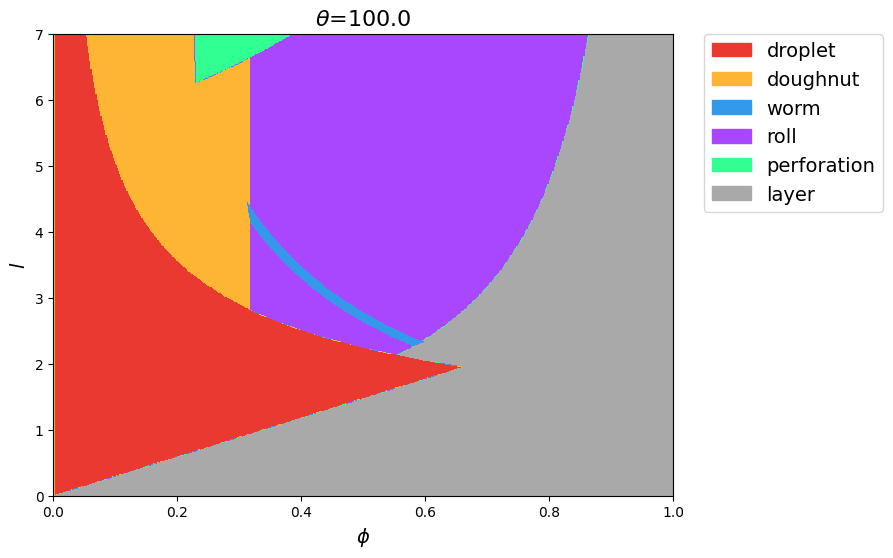

In [223]:
N_phi = 500
arr_phi = np.linspace(0, 1, N_phi)

M_l = 500
arr_l = np.linspace(0.001, 7, M_l)

theta = np.deg2rad(100)

grid = np.zeros((M_l, N_phi), dtype=int)

for i, l in enumerate(arr_l):
    for j, phi in enumerate(arr_phi):
        S = np.array([
            S_drop(phi, l, theta)[0],
            S_dou(phi, l, theta)[0],
            S_worm(phi, l, theta)[0],
            S_roll(phi, l, theta)[0],
            S_perf(phi, l, theta)[0],
            2*l*l
        ])

        grid[i, j] = np.argmin(S)

plt.figure(figsize=(8, 6))
plt.title(r'$\theta$'+'={:.1f}'.format(np.rad2deg(theta)), fontsize=16)

names = np.array(['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer'])
colors = ["#ea3930", "#ffb534", "#3499e8", "#a946ff", "#32ff92", "#a9a9a9"]
color_map = matplotlib.colors.ListedColormap(colors)
im = plt.imshow(grid[::-1, :], cmap=color_map, extent=[0, 1, 0, 7], aspect="auto")

patches = [ mpatches.Patch(color=colors[i], label=names[i]) for i in range(6) ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=14)

plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel(r'$l$', fontsize=14)
plt.show()

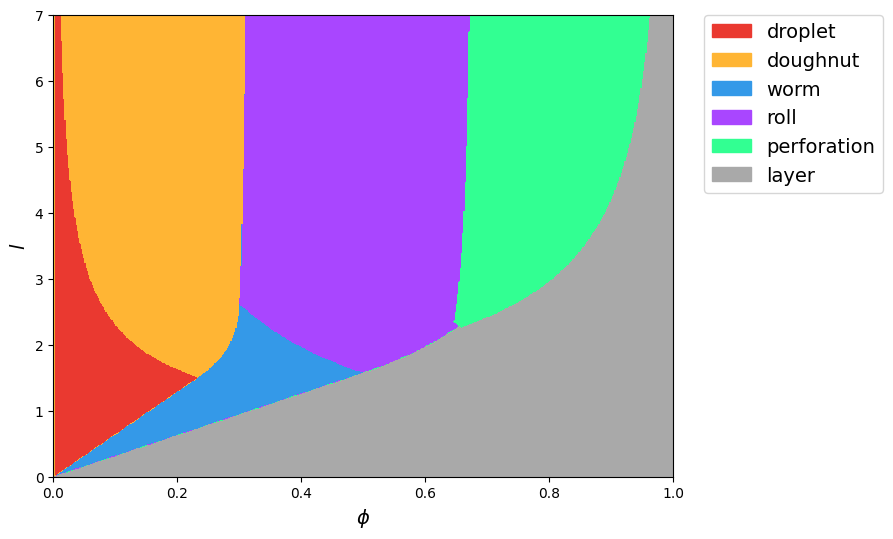

In [214]:
N_phi = 500
arr_phi = np.linspace(0, 1, N_phi)

M_l = 500
arr_l = np.linspace(0.001, 7, M_l)

grid = np.zeros((M_l, N_phi), dtype=int)

for i, l in enumerate(arr_l):
    for j, phi in enumerate(arr_phi):
        S = np.array([
            S_drop_180(phi, l)[0],
            S_dou_180(phi, l)[0],
            S_worm_180(phi, l)[0],
            S_roll_180(phi, l)[0],
            S_perf_180(phi, l)[0],
            2*l*l
        ])

        grid[i, j] = np.argmin(S)

plt.figure(figsize=(8, 6))

names = np.array(['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer'])
colors = ["#ea3930", "#ffb534", "#3499e8", "#a946ff", "#32ff92", "#a9a9a9"]
color_map = matplotlib.colors.ListedColormap(colors)
im = plt.imshow(grid[::-1, :], cmap=color_map, extent=[0, 1, 0, 7], aspect="auto")

patches = [ mpatches.Patch(color=colors[i], label=names[i]) for i in range(6) ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=14)

plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel(r'$l$', fontsize=14)
plt.show()

In [121]:
phi = 0.1
l = 0.5
theta = np.pi

S = np.array([
            S_drop(phi, l, theta),
            S_dou(phi, l, theta),
            S_worm(phi, l, theta),
            S_roll(phi, l, theta),
            S_perf(phi, l, theta),
            2*l*l
        ])

for i in range(6):
    if np.isnan(S[i]):
        S[i] = 100
print(S)
print(np.argmin(S))

[  0.41347012 100.           0.39633273   0.83539816   1.09383776
   0.5       ]
2


/var/folders/jx/xrzz7g5x5g582hdxfxg7fb680000gn/T/ipykernel_62366/876479228.py:2: RuntimeWarning: invalid value encountered in sqrt
  d = (np.pi-2*theta)/np.cos(theta)**2/4 - np.tan(theta)/2 + np.sqrt(-4 + 64*phi*l*l/np.pi + (np.pi-2*theta)**2/np.cos(theta)**4 + 8*(np.cos(2*theta)-5)/np.cos(theta)**2/3 + 4*(1+(np.pi-2*theta)*np.tan(theta))/np.cos(theta)**2) / 4


---

In [137]:
data = np.loadtxt('divdiag.dat', skiprows=1, col)

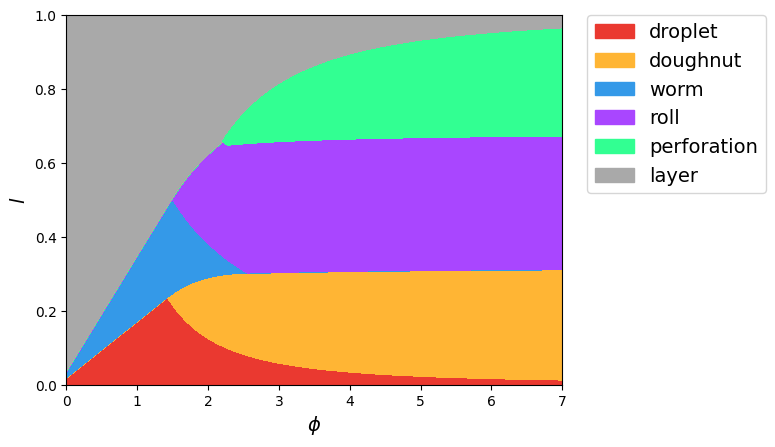

In [211]:
names = np.array(['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer'])
colors = ["#ea3930", "#ffb534", "#3499e8", "#a946ff", "#32ff92", "#a9a9a9"]
color_map = matplotlib.colors.ListedColormap(colors)
im = plt.imshow(data[::-1, 1:], cmap=color_map, extent=[0, 7, 0, 1], aspect="auto")

patches = [ mpatches.Patch(color=colors[i], label=names[i]) for i in range(6) ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=14)

plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel(r'$l$', fontsize=14)
plt.show()

In [141]:
data

array([[0.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e-04, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e-04, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [9.998e-01, 6.000e+00, 6.000e+00, ..., 6.000e+00, 6.000e+00,
        6.000e+00],
       [9.999e-01, 6.000e+00, 6.000e+00, ..., 6.000e+00, 6.000e+00,
        6.000e+00],
       [1.000e+00, 6.000e+00, 6.000e+00, ..., 6.000e+00, 6.000e+00,
        6.000e+00]])